In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# ACT1 OUTLIERS

## 1.Limpieza y exploración inicial

In [121]:
df1=pd.read_csv("Outliers_datos.csv")
df1_raw=df1.copy()
df1_raw.shape

(200000, 6)

In [122]:
df1.head()

,tienda_id,clientes_mes,ticket_promedio,ventas_mensuales,empleados,metros_cuadrados
0,1,1485.0,29.48,45256.41,9.0,152
1,2,837.0,23.67,20326.15,6.0,136
2,3,670.0,21.82,14985.37,5.0,156
3,4,1147.0,22.92,26040.98,6.0,178
4,5,840.0,28.32,24192.05,6.0,134


In [123]:
df1_raw.info()
df1_raw.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tienda_id         200000 non-null  int64  
 1   clientes_mes      199900 non-null  float64
 2   ticket_promedio   199889 non-null  float64
 3   ventas_mensuales  199816 non-null  float64
 4   empleados         199897 non-null  float64
 5   metros_cuadrados  200000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 9.2 MB


tienda_id             int64
clientes_mes        float64
ticket_promedio     float64
ventas_mensuales    float64
empleados           float64
metros_cuadrados      int64
dtype: object

In [124]:
df1_raw.describe()

,tienda_id,clientes_mes,ticket_promedio,ventas_mensuales,empleados,metros_cuadrados
count,200000.000000,199900.000000,199889.000000,199816.000000,199897.000000,200000.000000
mean,100000.500000,891.934132,24.007728,21439.432915,6.481378,139.650340
std,57735.171256,234.277728,2.998576,6689.569952,1.993823,25.798547
min,1.000000,20.000000,11.040000,418.850000,1.000000,20.000000
25%,50000.750000,739.000000,21.980000,17098.657500,5.000000,123.000000
50%,100000.500000,891.000000,24.010000,21064.980000,6.000000,140.000000
75%,150000.250000,1043.000000,26.030000,25351.690000,8.000000,156.000000
max,200000.000000,6420.000000,37.580000,323088.480000,33.000000,585.000000


In [125]:
df1_raw['tienda_id'].nunique() == len(df1_raw)
df1_raw = df1_raw[
    (df1_raw['clientes_mes'] > 0) &
    (df1_raw['ticket_promedio'] > 0) &
    (df1_raw['ventas_mensuales'] >= 0) &
    (df1_raw['empleados'] > 0) &
    (df1_raw['metros_cuadrados'] > 0)
]

In [126]:
df1_raw.isna().sum()

tienda_id           0
clientes_mes        0
ticket_promedio     0
ventas_mensuales    0
empleados           0
metros_cuadrados    0
dtype: int64

In [127]:
df1_raw.isna().sum()/len(df1_raw)

tienda_id           0.0
clientes_mes        0.0
ticket_promedio     0.0
ventas_mensuales    0.0
empleados           0.0
metros_cuadrados    0.0
dtype: float64

In [128]:
y=df1_raw['ventas_mensuales']
x=df1_raw.drop(columns=['ventas_mensuales','tienda_id'])

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42 )

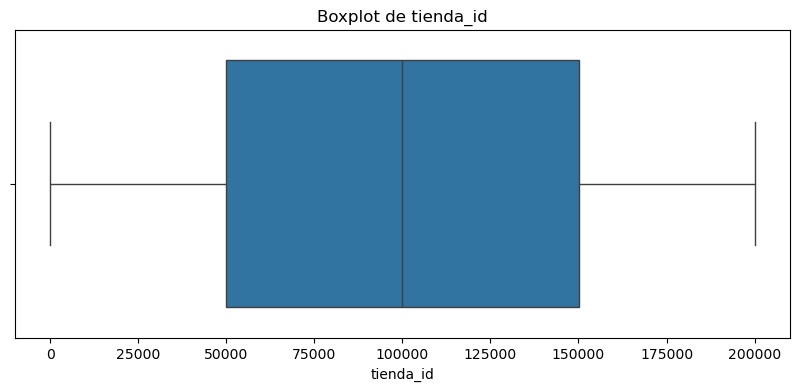

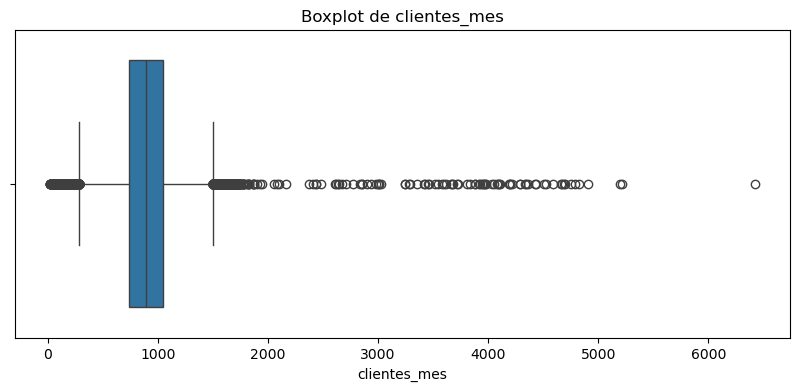

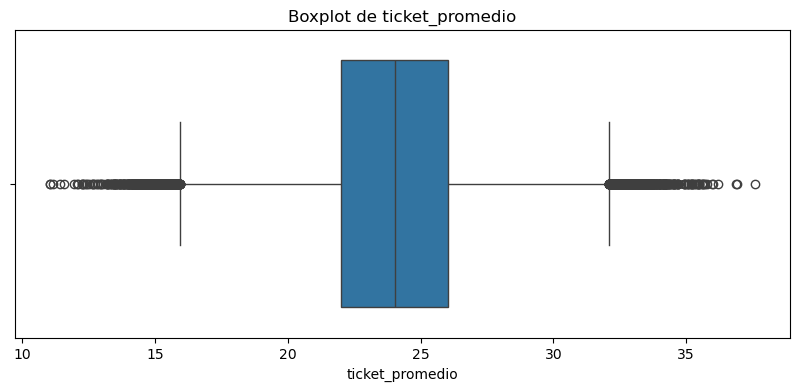

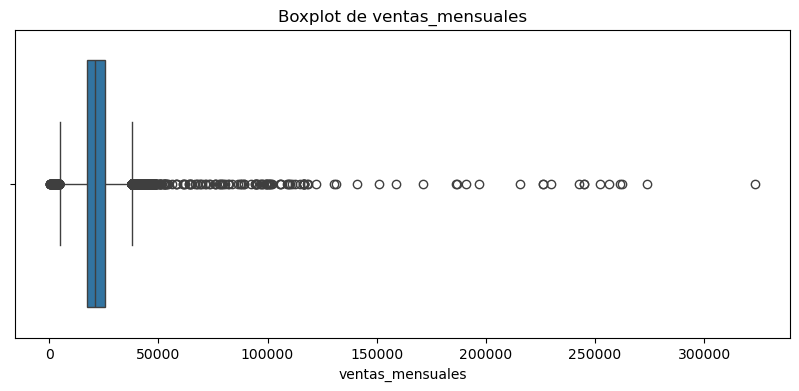

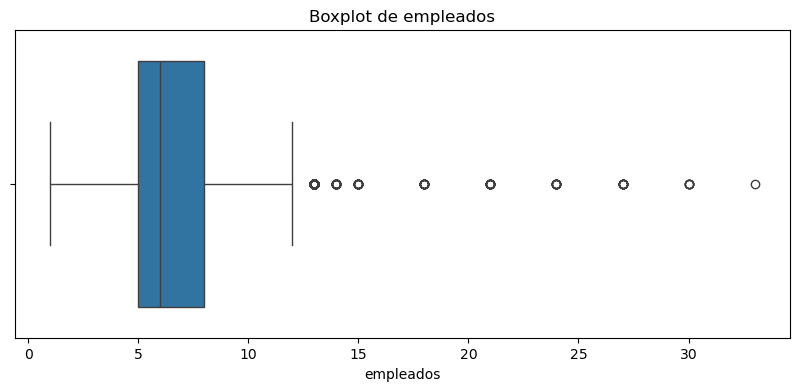

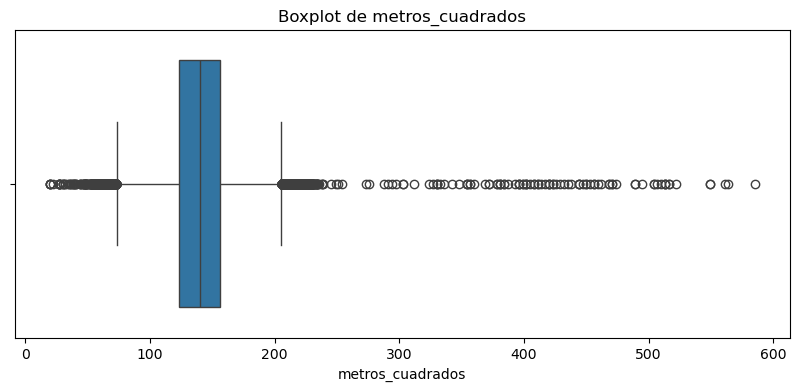

In [129]:
for column in df1_raw.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_raw[column])
    plt.title(f"Boxplot de {column}", fontsize=12)
    plt.xlabel(column)
    plt.show()

In [130]:
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(round(IQR, 2))
print(round(lower,2))
print(round(upper,2))

outliers = y_train[
    (y_train < lower) |
    (y_train > upper)
]

print("Cantidad de outliers:", len(outliers))


8250.67
4715.82
37718.49
Cantidad de outliers: 1568


In [131]:
# cálculo vectorizado del z-score
z_scores = (y_train - y_train.mean()) / y_train.std()
print('Outliers por z-score',len(z_scores>3))

Outliers por z-score 159602


In [132]:

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(x_train)
outliers = iso_forest.predict(x_train) 
es_outlier=outliers==-1

print(f"Número de outliers detectados: {sum(es_outlier)}")

x_train_clean = x_train[~es_outlier]
y_train_clean = y_train[~es_outlier]

print(f"Registros antes: {len(x_train)}")
print(f"Registros después: {len(x_train_clean)}")

""" for col in x_train_clean.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_raw[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """

Número de outliers detectados: 7981
Registros antes: 159602
Registros después: 151621


' for col in x_train_clean.columns:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_raw[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

In [133]:
x_train_clean = x_train[(y_train >= lower) & (y_train <= upper)].copy()
y_train_clean = y_train[(y_train >= lower) & (y_train <= upper)].copy()

print('Antes (entrenamiento):', len(x_train))
print('Después (entrenamiento):', len(x_train_clean))

""" for col in x_train_clean.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_raw[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """

Antes (entrenamiento): 159602
Después (entrenamiento): 158034


' for col in x_train_clean.columns:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_raw[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

### Mi versión del ejercicio sin train y test

### IQR

In [134]:
num_cols=df1_raw.select_dtypes('number').columns

Q1= df1_raw[num_cols].quantile(0.25)
Q3=df1_raw[num_cols].quantile(0.75)
IQR=Q3-Q1
print(IQR)

upper= Q3+1.5*IQR
lower= Q1-1.5*IQR

df1_clean = df1_raw[((df1_raw[num_cols] >= lower) & (df1_raw[num_cols] <= upper)).all(axis=1)]
print(f"Registros originales: {len(df1_raw)}")
print(f"Registros tras limpiar todos los outliers: {len(df1_clean)}")

""" for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_clean[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """

tienda_id           100031.000
clientes_mes           303.000
ticket_promedio          4.040
ventas_mensuales      8251.455
empleados                3.000
metros_cuadrados        33.000
dtype: float64
Registros originales: 199503
Registros tras limpiar todos los outliers: 194057


' for col in num_cols:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_clean[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

### Z-SCORE

In [135]:
media=df1_raw[num_cols].mean()
std=df1_raw[num_cols].std()
print(media)
print(std)

ZSCORE=(df1_raw[num_cols]-media)/std
#print(ZSCORE)

print('outliers:', ZSCORE[(ZSCORE>3) | (ZSCORE<-3)].count())

filas_outliers = (ZSCORE.abs() > 3).any(axis=1)

df1_clean=df1_raw[~filas_outliers].copy()
print(f'filas antes: {len(df1_raw)}')
print(f'filas después: {len(df1_clean)}')

""" for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_clean[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """



tienda_id           99992.381172
clientes_mes          892.380821
ticket_promedio        24.009313
ventas_mensuales    21440.002838
empleados               6.483692
metros_cuadrados      139.687208
dtype: float64
tienda_id           57742.844609
clientes_mes          233.663192
ticket_promedio         2.998083
ventas_mensuales     6686.124252
empleados               1.992440
metros_cuadrados       25.746453
dtype: float64
outliers: tienda_id             0
clientes_mes        470
ticket_promedio     536
ventas_mensuales    530
empleados           288
metros_cuadrados    490
dtype: int64
filas antes: 199503
filas después: 197683


' for col in num_cols:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_clean[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

In [136]:
iso_forest=IsolationForest(contamination=0.1, random_state=42)
preds=iso_forest.fit_predict(df1_raw[num_cols])

mask_normales=(preds==1)
df1_clean=df1_raw[mask_normales].copy()
print(f'filas antes: {len(df1_raw)}')
print(f'filas después: {len(df1_clean)}')

""" for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_clean[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """


filas antes: 199503
filas después: 179552


' for col in num_cols:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_clean[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

df1_IQR=df1_copy()

# ACT2 CONVERSIÓN DE TIPOS

## Importado

In [137]:
df2=pd.read_csv('social_services_incidents_raw.csv')
df2_raw=df2.copy()
df2_raw.shape

(200000, 10)

In [138]:
df2_raw.head()

,incident_id,incident_datetime,city,service_type,risk_level,people_affected,response_time_minutes,cost_estimated,incident_description,reported_by
0,1,2019-01-01 00:00:00,Leeds,Housing Support,Low,2.0,unknown,481.59,Routine social support follow-up,NGO
1,2,2019-01-01 00:15:46.516732583,Bristol,Mental Health,Low,1.0,79.97,342.83,Low risk assistance request,School
2,3,2019-01-01,LONDON,Social Services,Medium,6.0,34.55,1784.11,Ongoing support intervention,School
3,4,2019-01-01 00:47:19.550197750,Manchester,Emergency,low,2.0,65.86,522.94,Low risk assistance request,School
4,5,2019-01-01 01:03:06.066930334,Manchester,Housing Support,Low,2.0,68.44,865.27 €,NaN,Citizen


In [139]:
df2_raw.info()
df2_raw.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   incident_id            200000 non-null  int64  
 1   incident_datetime      200000 non-null  object 
 2   city                   200000 non-null  object 
 3   service_type           200000 non-null  object 
 4   risk_level             200000 non-null  object 
 5   people_affected        183757 non-null  float64
 6   response_time_minutes  200000 non-null  object 
 7   cost_estimated         200000 non-null  object 
 8   incident_description   180131 non-null  object 
 9   reported_by            200000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 15.3+ MB


incident_id                int64
incident_datetime         object
city                      object
service_type              object
risk_level                object
people_affected          float64
response_time_minutes     object
cost_estimated            object
incident_description      object
reported_by               object
dtype: object

In [140]:
df2_raw.describe()

,incident_id,people_affected
count,200000.000000,183757.000000
mean,100000.500000,4.809346
std,57735.171256,3.546969
min,1.000000,1.000000
25%,50000.750000,2.000000
50%,100000.500000,3.000000
75%,150000.250000,7.000000
max,200000.000000,14.000000


## Limpieza de datos

In [141]:
cat_cols=df2_raw.select_dtypes(include="O").columns
num_cols=df2_raw.select_dtypes(include="number").columns

In [142]:
#df2_raw[cat_cols] = df2_raw[cat_cols].astype(str).str.strip().str.title()

for col in cat_cols:
    df2_raw[col] = df2_raw[col].astype(str).str.strip().str.title()
print(df2_raw.head())

   incident_id              incident_datetime        city     service_type  \
0            1            2019-01-01 00:00:00       Leeds  Housing Support   
1            2  2019-01-01 00:15:46.516732583     Bristol    Mental Health   
2            3                     2019-01-01      London  Social Services   
3            4  2019-01-01 00:47:19.550197750  Manchester        Emergency   
4            5  2019-01-01 01:03:06.066930334  Manchester  Housing Support   

  risk_level  people_affected response_time_minutes cost_estimated  \
0        Low              2.0               Unknown         481.59   
1        Low              1.0                 79.97         342.83   
2     Medium              6.0                 34.55        1784.11   
3        Low              2.0                 65.86         522.94   
4        Low              2.0                 68.44       865.27 €   

               incident_description reported_by  
0  Routine Social Support Follow-Up         Ngo  
1       Lo

In [143]:

df2_raw['risk_level']=df2_raw['risk_level'].astype(str).str.strip().str.upper()
df2_raw['risk_level'].head(10)

0       LOW
1       LOW
2    MEDIUM
3       LOW
4       LOW
5       LOW
6    MEDIUM
7       LOW
8      HIGH
9      HIGH
Name: risk_level, dtype: object

In [144]:
df2_raw['people_affected']=pd.to_numeric(df2_raw['people_affected'], errors='coerce' )
df2_raw = df2_raw.dropna(subset=['people_affected']).reset_index()
df2_raw['people_affected']=df2_raw['people_affected'].astype(int)
df2_raw['people_affected'].head(10)

0     2
1     1
2     6
3     2
4     2
5     3
6     2
7     6
8     6
9    13
Name: people_affected, dtype: int64

In [145]:

df2_raw['response_time_minutes'] = pd.to_numeric(df2_raw['response_time_minutes'], errors='coerce')
df2_raw = df2_raw.dropna(subset=['response_time_minutes'])
df2_raw = df2_raw[df2_raw['response_time_minutes'] >= 0]
print(df2_raw[['response_time_minutes']].head())

   response_time_minutes
1                  79.97
2                  34.55
3                  65.86
4                  68.44
5                  68.93


In [146]:
df2_raw['cost_estimated'] = (df2_raw['cost_estimated'].astype(str)
                        .str.replace('€', '', regex=False)
                        .str.replace(',', '', regex=False)
                        .str.strip())
df2_raw['cost_estimated'] = pd.to_numeric(df2_raw['cost_estimated'], errors='coerce')
print(df2_raw[['cost_estimated']].head())

   cost_estimated
1          342.83
2         1784.11
3          522.94
4          865.27
5         1953.11


In [147]:
df2_raw['service_type'] = df2_raw['service_type'].astype(str).str.strip().str.title()
print(df2_raw[['service_type']].head())

      service_type
1    Mental Health
2  Social Services
3        Emergency
4  Housing Support
5        Emergency


In [148]:
df2_raw['reported_by'] = df2_raw['reported_by'].astype(str).str.strip().str.title()
print(df2_raw[['reported_by']].head())

  reported_by
1      School
2      School
3      School
4     Citizen
5      School


In [149]:

df2_raw['incident_datetime'] = df2_raw['incident_datetime'].astype(str)


es_fecha_larga = df2_raw['incident_datetime'].str.contains(r'\.\d+', regex=True)


df2_raw['incident_datetime_clean'] = pd.NaT


df2_raw.loc[es_fecha_larga, 'incident_datetime_clean'] = pd.to_datetime(
    df2_raw.loc[es_fecha_larga, 'incident_datetime'].str.slice(0, 19),
    errors='coerce'
)


df2_raw['incident_datetime'] = df2_raw['incident_datetime_clean']
df2_raw.drop(columns=['incident_datetime_clean'], inplace=True)


print(df2_raw['incident_datetime'].head())

1   2019-01-01 00:15:46
2                   NaT
3   2019-01-01 00:47:19
4   2019-01-01 01:03:06
5   2019-01-01 01:18:52
Name: incident_datetime, dtype: datetime64[ns]


# ACT3 VARIABLES CATEGÓRICAS

## Limpieza

In [150]:
tipos_optimizados = {
    'fuel': 'category',
    'transmission': 'category',
    'drive': 'category',
    'type': 'category',
    'paint_color': 'category',
    'condition': 'category'
}

df = pd.read_csv('vehicles.csv', dtype=tipos_optimizados)
print("✅ Carga optimizada completada.")

✅ Carga optimizada completada.


In [151]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"✅ División completada con éxito:")
print(f"   - Entrenamiento (80%): {X_train.shape[0]} registros")
print(f"   - Prueba (20%): {X_test.shape[0]} registros")

✅ División completada con éxito:
   - Entrenamiento (80%): 80 registros
   - Prueba (20%): 20 registros


In [152]:
null_report = (X_train.isnull().sum() / len(X_train)) * 100
print("--- Porcentaje de nulos por columna ---")
print(null_report[null_report > 0].sort_values(ascending=False))

--- Porcentaje de nulos por columna ---
county    100.0
dtype: float64


In [153]:

cols_descartadas = ['county', 'size', 'VIN', 'url', 'region_url', 'image_url', 'description', 'lat', 'long']
X_train = X_train.drop(columns=cols_descartadas)
X_test= X_test.drop(columns=cols_descartadas)

In [154]:
mediana_km = X_train['odometer'].median()
X_train['odometer'] = X_train['odometer'].fillna(mediana_km)
X_test['odometer'] = X_test['odometer'].fillna(mediana_km)

In [155]:

moda_marca = X_train['manufacturer'].mode()[0]
X_train['manufacturer'] = X_train['manufacturer'].fillna(moda_marca)
X_test['manufacturer'] = X_test['manufacturer'].fillna(moda_marca)

In [156]:

X_train['condition'] = X_train['condition'].cat.add_categories('unknown')
X_test['condition'] = X_test['condition'].cat.add_categories('unknown')

X_train['condition'] = X_train['condition'].fillna('unknown')
X_test['condition'] = X_test['condition'].fillna('unknown')

print("✅ 'unknown' añadido correctamente como categoría en 'condition'.")
print(f"Nulos en condition (Train): {X_train['condition'].isnull().sum()}")

✅ 'unknown' añadido correctamente como categoría en 'condition'.
Nulos en condition (Train): 0


In [157]:


cols_categoricas_faltantes = ['cylinders', 'drive', 'paint_color', 'type', 'fuel', 'transmission', 'title_status', 'model']
cols_numericas_faltantes = ['year'] 
for col in cols_categoricas_faltantes:
    if col in X_train.columns:
        moda = X_train[col].mode()[0]
        X_train[col] = X_train[col].fillna(moda)
        X_test[col] = X_test[col].fillna(moda)

for col in cols_numericas_faltantes:
    if col in X_train.columns:
        mediana = X_train[col].median()
        X_train[col] = X_train[col].fillna(mediana)
        X_test[col] = X_test[col].fillna(mediana)

print("✨ ¡Ahora sí! Todo el bloque central está limpio.")

✨ ¡Ahora sí! Todo el bloque central está limpio.


In [158]:
# Eliminamos posting_date porque no aporta valor predictivo y tiene nulos residuales
if 'posting_date' in X_train.columns:
    X_train = X_train.drop(columns=['posting_date'])
    X_test = X_test.drop(columns=['posting_date'])

print(f"Nulos finales tras borrar metadatos: {X_train.isnull().sum().sum()}")

Nulos finales tras borrar metadatos: 0


## Encoding

### OrdinalEncoder

In [159]:
from sklearn.preprocessing import OrdinalEncoder

In [160]:
orden_logico = [['unknown', 'salvage', 'fair', 'good', 'excellent', 'like new', 'new']]

encoder_ord = OrdinalEncoder(categories=orden_logico)

In [161]:
X_train[['condition']] = encoder_ord.fit_transform(X_train[['condition']])
X_test[['condition']] = encoder_ord.transform(X_test[['condition']])

In [162]:
top_brands = X_train['manufacturer'].value_counts().nlargest(15).index

In [163]:
X_train['manufacturer'] = X_train['manufacturer'].apply(lambda x: x if x in top_brands else 'other')
X_test['manufacturer'] = X_test['manufacturer'].apply(lambda x: x if x in top_brands else 'other')

### one-hot-encoder

In [164]:
cols_to_onehot = ['manufacturer', 'fuel', 'transmission', 'drive', 'type']

X_train = pd.get_dummies(X_train, columns=cols_to_onehot, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cols_to_onehot, drop_first=True)

In [165]:

print(f"🚀 ¡Encoding completado!")
print(f"Dimensiones finales del dataset: {X_train.shape}")
print(f"Ejemplo de columnas nuevas: {list(X_train.columns[:10])}")
print('hecho')

🚀 ¡Encoding completado!
Dimensiones finales del dataset: (80, 37)
Ejemplo de columnas nuevas: ['id', 'region', 'year', 'model', 'condition', 'cylinders', 'odometer', 'title_status', 'paint_color', 'state']
hecho


# ACT4 NORMALIZACION

In [166]:
df = pd.read_csv("datos_hospital")
df = df.sample(n=1000)
print(df.info())
df.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 182 to 8
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   edad             1000 non-null   float64
 1   ingreso_anual    1000 non-null   float64
 2   visitas_medicas  1000 non-null   int64  
 3   riesgo_cronico   1000 non-null   float64
 4   gasto_sanitario  1000 non-null   float64
 5   tipo_seguro      1000 non-null   object 
 6   region           1000 non-null   object 
 7   riesgo_mm        1000 non-null   float64
 8   edad_std         1000 non-null   float64
 9   gasto_std        1000 non-null   float64
 10  gasto_robust     1000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 93.8+ KB
None


,edad,ingreso_anual,visitas_medicas,riesgo_cronico,gasto_sanitario,tipo_seguro,region,riesgo_mm,edad_std,gasto_std,gasto_robust
182,58.0,33698.66,3,0.49,3314.58,Mixto,Sur,0.49,0.551835,0.685666,0.685666
416,67.0,39372.39,4,0.65,2057.26,Mixto,Norte,0.65,1.181544,-0.384975,-0.384975
368,43.0,40606.88,1,0.42,2198.98,Mixto,Oeste,0.42,-0.497680,-0.264297,-0.264297
544,52.0,40003.46,1,0.68,3115.29,Mixto,Sur,0.68,0.132029,0.515965,0.515965
742,69.0,46650.19,4,0.79,3561.43,Privado,Sur,0.79,1.321480,0.895865,0.895865
885,37.0,43514.14,3,0.29,2348.96,Mixto,Sur,0.29,-0.917486,-0.136585,-0.136585
9,33.0,35676.50,1,0.18,1145.31,Mixto,Oeste,0.18,-1.197357,-1.161524,-1.161524
722,62.0,28866.73,2,0.60,3446.21,Mixto,Sur,0.60,0.831706,0.797752,0.797752
145,57.0,25423.97,1,0.43,2127.38,Mixto,Sur,0.43,0.481867,-0.325266,-0.325266
504,48.0,33591.06,3,0.49,2608.74,Mixto,Norte,0.49,-0.147842,0.084625,0.084625


In [167]:

df.describe()

,edad,ingreso_anual,visitas_medicas,riesgo_cronico,gasto_sanitario,riesgo_mm,edad_std,gasto_std,gasto_robust
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,50.113000,39820.646810,2.431000,0.492550,2637.408240,0.492550,1.776357e-17,0.109036,0.109036
std,14.299465,8775.431505,1.697091,0.169282,1391.910087,0.169282,1.000500e+00,1.185247,1.185247
min,18.000000,15137.020000,0.000000,0.000000,-115.630000,0.000000,-2.246872e+00,-2.235247,-2.235247
25%,40.000000,33936.662500,1.000000,0.380000,1924.517500,0.380000,-7.075831e-01,-0.498008,-0.498008
50%,50.000000,39794.370000,2.000000,0.490000,2509.360000,0.490000,-7.906348e-03,0.000000,0.000000
75%,60.000000,45221.500000,3.000000,0.610000,3098.880000,0.610000,6.917704e-01,0.501992,0.501992
max,95.000000,72331.570000,9.000000,1.000000,16439.590000,1.000000,3.140639e+00,11.861951,11.861951


In [168]:
df.describe(include="object")

,tipo_seguro,region
count,1000,1000
unique,3,4
top,Mixto,Este
freq,718,282


In [169]:
df.isnull().sum()

edad               0
ingreso_anual      0
visitas_medicas    0
riesgo_cronico     0
gasto_sanitario    0
tipo_seguro        0
region             0
riesgo_mm          0
edad_std           0
gasto_std          0
gasto_robust       0
dtype: int64

In [170]:
df.nunique()

edad                71
ingreso_anual      959
visitas_medicas     10
riesgo_cronico      88
gasto_sanitario    971
tipo_seguro          3
region               4
riesgo_mm           88
edad_std            71
gasto_std          971
gasto_robust       971
dtype: int64

In [171]:
df["ingreso_anual"] = df["ingreso_anual"].fillna(df["ingreso_anual"].median())
df["riesgo_cronico"] = df["riesgo_cronico"].fillna(df["riesgo_cronico"].median())
df["gasto_sanitario"] = df["gasto_sanitario"].fillna(df["gasto_sanitario"].median())

df.isnull().sum()

edad               0
ingreso_anual      0
visitas_medicas    0
riesgo_cronico     0
gasto_sanitario    0
tipo_seguro        0
region             0
riesgo_mm          0
edad_std           0
gasto_std          0
gasto_robust       0
dtype: int64

## MinMaxScaler

In [172]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
df['riesgo_mm'] = minmax.fit_transform(df[['riesgo_cronico']])

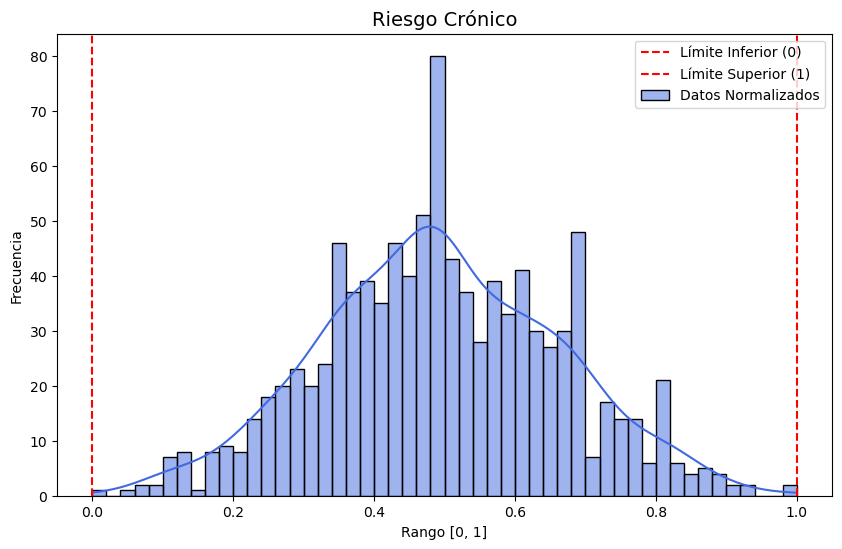

In [173]:
plt.figure(figsize=(10, 6))
sns.histplot(df['riesgo_mm'], kde=True, color='royalblue', bins=50, label='Datos Normalizados')
plt.title('Riesgo Crónico', fontsize=14)
plt.xlabel('Rango [0, 1]')
plt.ylabel('Frecuencia')


plt.axvline(0, color='red', linestyle='--', label='Límite Inferior (0)')
plt.axvline(1, color='red', linestyle='--', label='Límite Superior (1)')

plt.legend(loc='upper right')
plt.show()

## StandardScaler

In [174]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df['edad_std'] = std_scaler.fit_transform(df[['edad']])


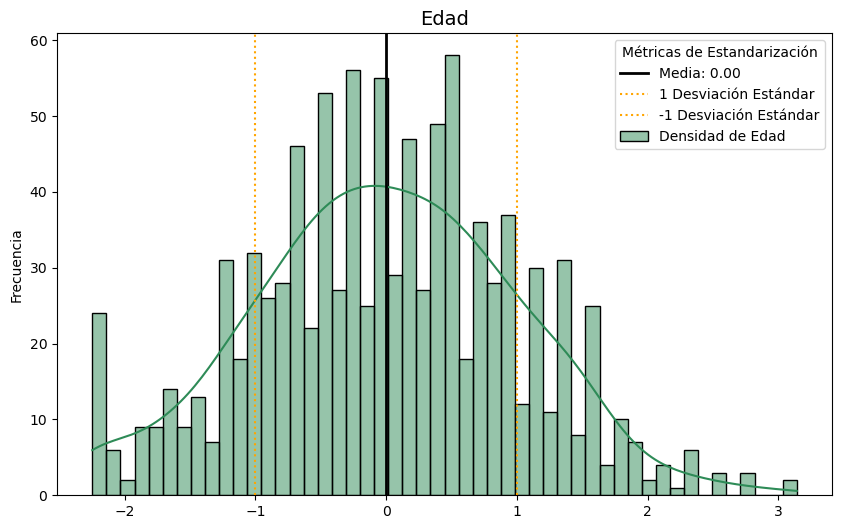

In [175]:
plt.figure(figsize=(10, 6))
sns.histplot(df['edad_std'], kde=True, color='seagreen', bins=50, label='Densidad de Edad')
plt.title('Edad', fontsize=14)
plt.xlabel('')
plt.ylabel('Frecuencia')

# Línea de la media
plt.axvline(df['edad_std'].mean(), color='black', linestyle='-', linewidth=2, label=f'Media: {df["edad_std"].mean():.2f}')
plt.axvline(1, color='orange', linestyle=':', label='1 Desviación Estándar')
plt.axvline(-1, color='orange', linestyle=':', label='-1 Desviación Estándar')

plt.legend(title="Métricas de Estandarización", loc='upper right')
plt.show()

## RobustScaler

In [176]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()
df['gasto_std'] = rb_scaler.fit_transform(df[['gasto_sanitario']])
df['gasto_robust'] = rb_scaler.fit_transform(df[['gasto_sanitario']])

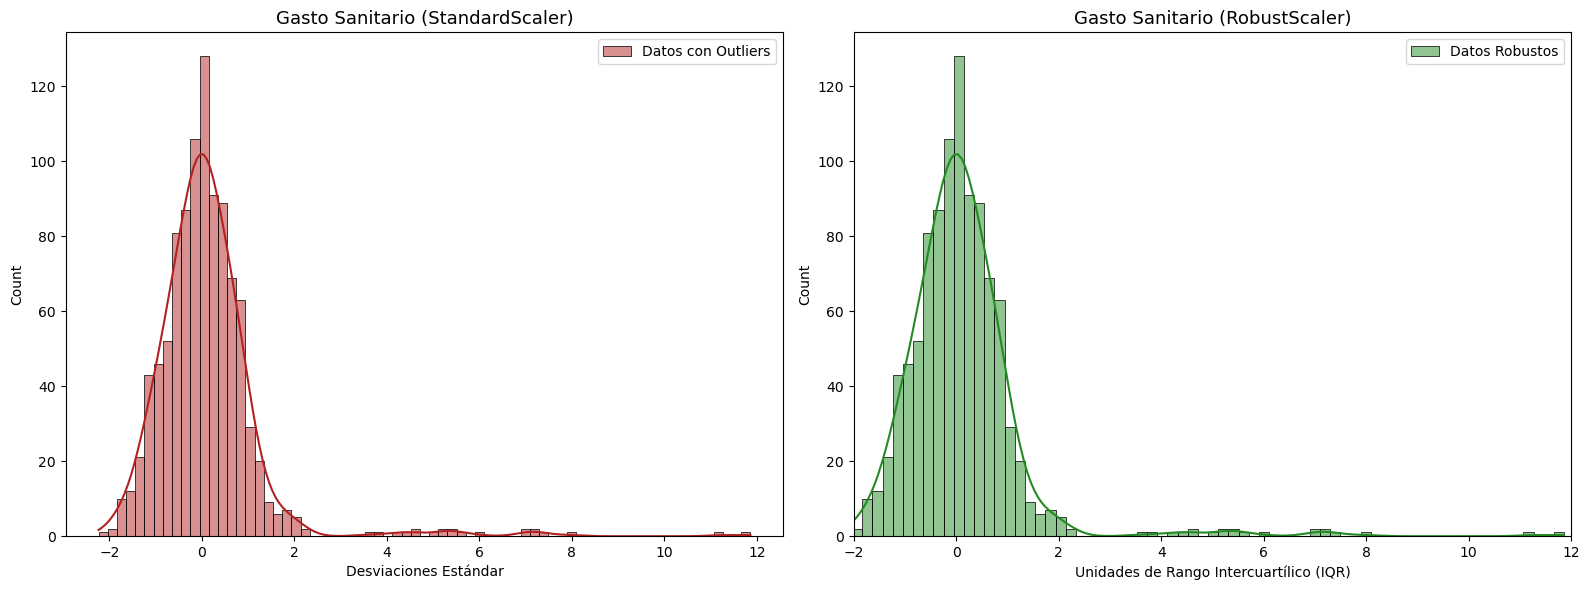

In [177]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#StandardScaler
sns.histplot(df['gasto_std'], kde=True, color='firebrick', ax=ax1, label='Datos con Outliers')
ax1.set_title('Gasto Sanitario (StandardScaler)', fontsize=13)
ax1.set_xlabel('Desviaciones Estándar')
ax1.legend()

#RobustScaler
sns.histplot(df['gasto_robust'], kde=True, color='forestgreen', ax=ax2, label='Datos Robustos')
ax2.set_xlim(-2, 12) 
ax2.set_title('Gasto Sanitario (RobustScaler)', fontsize=13)
ax2.set_xlabel('Unidades de Rango Intercuartílico (IQR)')
ax2.legend()

plt.tight_layout()
plt.show()